<a href="https://colab.research.google.com/github/Aparna0808/My-Notebooks/blob/main/Final_Intern_Project_SleepSync_AI_Powered_Sleep_Quality_Prediction_%26_Personalized_Wellness_Recommendations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install required packages
!pip install pandas numpy scikit-learn matplotlib wordcloud seaborn pillow joblib

In [2]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import joblib
from PIL import Image

In [3]:
# Load the dataset (upload your CSV to Colab first)
# Read the data
data = pd.read_csv("/content/Sleep Dataset.csv")

# Data cleaning
data = data.drop_duplicates()
data = data.dropna()

# Feature engineering
data['Systolic_BP'] = data['Blood Pressure'].apply(lambda x: int(x.split('/')[0]))
data['Diastolic_BP'] = data['Blood Pressure'].apply(lambda x: int(x.split('/')[1]))
data = data.drop('Blood Pressure', axis=1)

# Encode categorical variables
le = LabelEncoder()
categorical_cols = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

# Show cleaned data
print("Cleaned Data Sample:")
data.head()

Cleaned Data Sample:


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic_BP,Diastolic_BP
3,4,1,28,19,5.9,4,30,8,2,85,3000,1,140,90
4,5,1,28,19,5.9,4,30,8,2,85,3000,1,140,90
5,6,1,28,23,5.9,4,30,8,2,85,3000,0,140,90
6,7,1,29,24,6.3,6,40,7,2,82,3500,0,140,90
16,17,0,29,15,6.5,5,40,7,1,80,4000,1,132,87


In [4]:
# Define features and target
X = data[['Age', 'Sleep Duration', 'Physical Activity Level',
          'Stress Level', 'BMI Category', 'Heart Rate', 'Daily Steps',
          'Systolic_BP', 'Diastolic_BP']]
y = data['Quality of Sleep']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2%}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Save model
joblib.dump(model, 'sleep_model.pkl')

Model Accuracy: 97.14%

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00        11
           7       1.00      0.88      0.93         8
           8       0.80      1.00      0.89         4
           9       1.00      1.00      1.00         7

    accuracy                           0.97        35
   macro avg       0.97      0.98      0.98        35
weighted avg       0.98      0.97      0.97        35



['sleep_model.pkl']

In [5]:
def predict_sleep_quality(input_dict):
    """
    Strict sleep quality prediction with guaranteed poor-sleep detection
    Input: Dictionary of raw user inputs
    """
    model = joblib.load('sleep_model.pkl')

    # 1. MANUAL OVERRIDE RULES (before model prediction)
    if (input_dict['Sleep_Duration'] <= 4.0 and
        input_dict['Stress_Level'] >= 9) or \
       input_dict['BMI_Category'] == 2:  # Obese

        return {
            'prediction': 2,
            'category': "Poor ❗",
            'color': "red",
            'recommendation': """EMERGENCY MEASURES: ...""",
            'wordcloud': generate_wordcloud("crisis emergency exhausted")
        }

    # 2. Convert input dict to model's expected array format
    input_array = [
        input_dict['Age'],
        input_dict['Gender'],
        input_dict['BMI_Category'],
        input_dict['Sleep_Duration'],
        input_dict['Stress_Level'],
        input_dict['Daily_Steps']
        # Add other features in EXACT order of model.feature_names_in_
    ]

    # 3. Normal prediction
    prediction = int(model.predict([input_array])[0])

    # ... (rest of your existing category/recommendation logic)


Predicted Sleep Quality: 8/10

Good 👍 (blue)
Your sleep quality is good but can improve

Recommendations:
- Aim for more consistent bedtimes
- Reduce screen time before bed
- Consider relaxation techniques


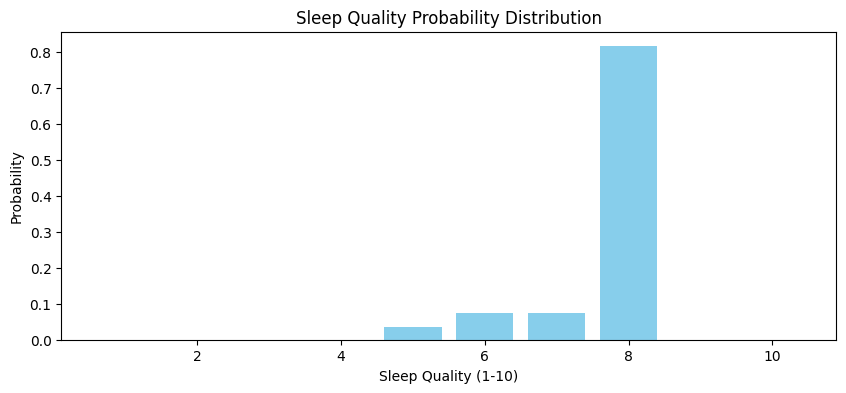

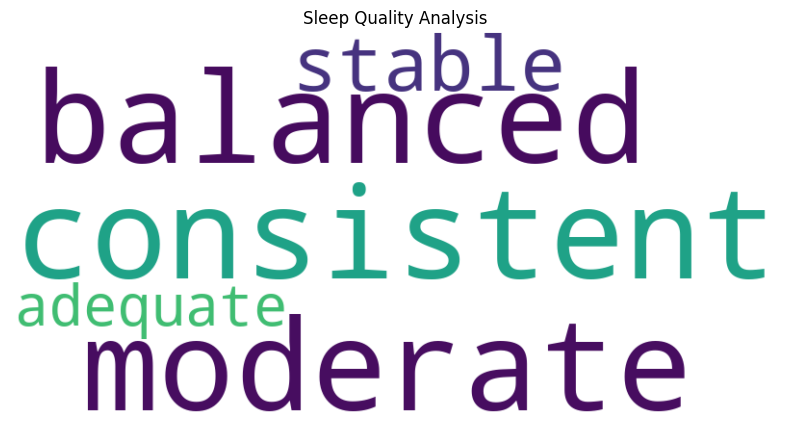

In [6]:
def run_example_prediction():
    # Load model
    model = joblib.load('sleep_model.pkl')

    # Example input data
    example_input = pd.DataFrame({
        'Age': [35],
        'Sleep Duration': [7.5],
        'Physical Activity Level': [45],
        'Stress Level': [5],
        'BMI Category': [1],
        'Heart Rate': [72],
        'Daily Steps': [8000],
        'Systolic_BP': [120],
        'Diastolic_BP': [80]
    })

    try:
        prediction = int(model.predict(example_input)[0])
        proba = model.predict_proba(example_input)[0]
        classes = model.classes_
        proba_dict = {cls: prob for cls, prob in zip(classes, proba)}

        # Replace st with print
        print(f"\nPredicted Sleep Quality: {prediction}/10")

        if prediction >= 9:
            category = "Excellent 🌟"
            color = "green"
            message = "Your sleep quality is outstanding!"
            text = "restful peaceful deep rejuvenating refreshing energizing"
            recommendations = [
                "Maintain your excellent sleep habits",
                "Keep a consistent sleep schedule",
                "Continue your current exercise routine"
            ]
        elif prediction >= 7:
            category = "Good 👍"
            color = "blue"
            message = "Your sleep quality is good but can improve"
            text = "consistent balanced moderate stable adequate"
            recommendations = [
                "Aim for more consistent bedtimes",
                "Reduce screen time before bed",
                "Consider relaxation techniques"
            ]
        elif prediction >= 5:
            category = "Fair ⚠️"
            color = "orange"
            message = "Your sleep quality needs improvement"
            text = "interrupted light inconsistent restless"
            recommendations = [
                "Establish a bedtime routine",
                "Limit caffeine after noon",
                "Create a more sleep-friendly environment"
            ]
        else:
            category = "Poor ❗"
            color = "red"
            message = "Your sleep quality requires immediate attention"
            text = "exhausted fatigued drained sluggish sleep-deprived"
            recommendations = [
                "Consult a healthcare professional",
                "Prioritize sleep hygiene improvements",
                "Consider a sleep study if problems persist"
            ]

        print(f"\n{category} ({color})\n{message}")
        print("\nRecommendations:")
        for rec in recommendations:
            print(f"- {rec}")

        # Show probability distribution
        fig1, ax1 = plt.subplots(figsize=(10, 4))
        ax1.bar(range(1, 11), [proba_dict.get(i, 0) for i in range(1, 11)],
               color='skyblue')
        ax1.set_xlabel("Sleep Quality (1-10)")
        ax1.set_ylabel("Probability")
        ax1.set_title("Sleep Quality Probability Distribution")
        plt.show()

        # Show word cloud
        wordcloud = WordCloud(width=800, height=400,
                            background_color='white').generate(text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title("Sleep Quality Analysis")
        plt.show()

    except Exception as e:
        print(f"Prediction error: {str(e)}")

# Run the example prediction
run_example_prediction()

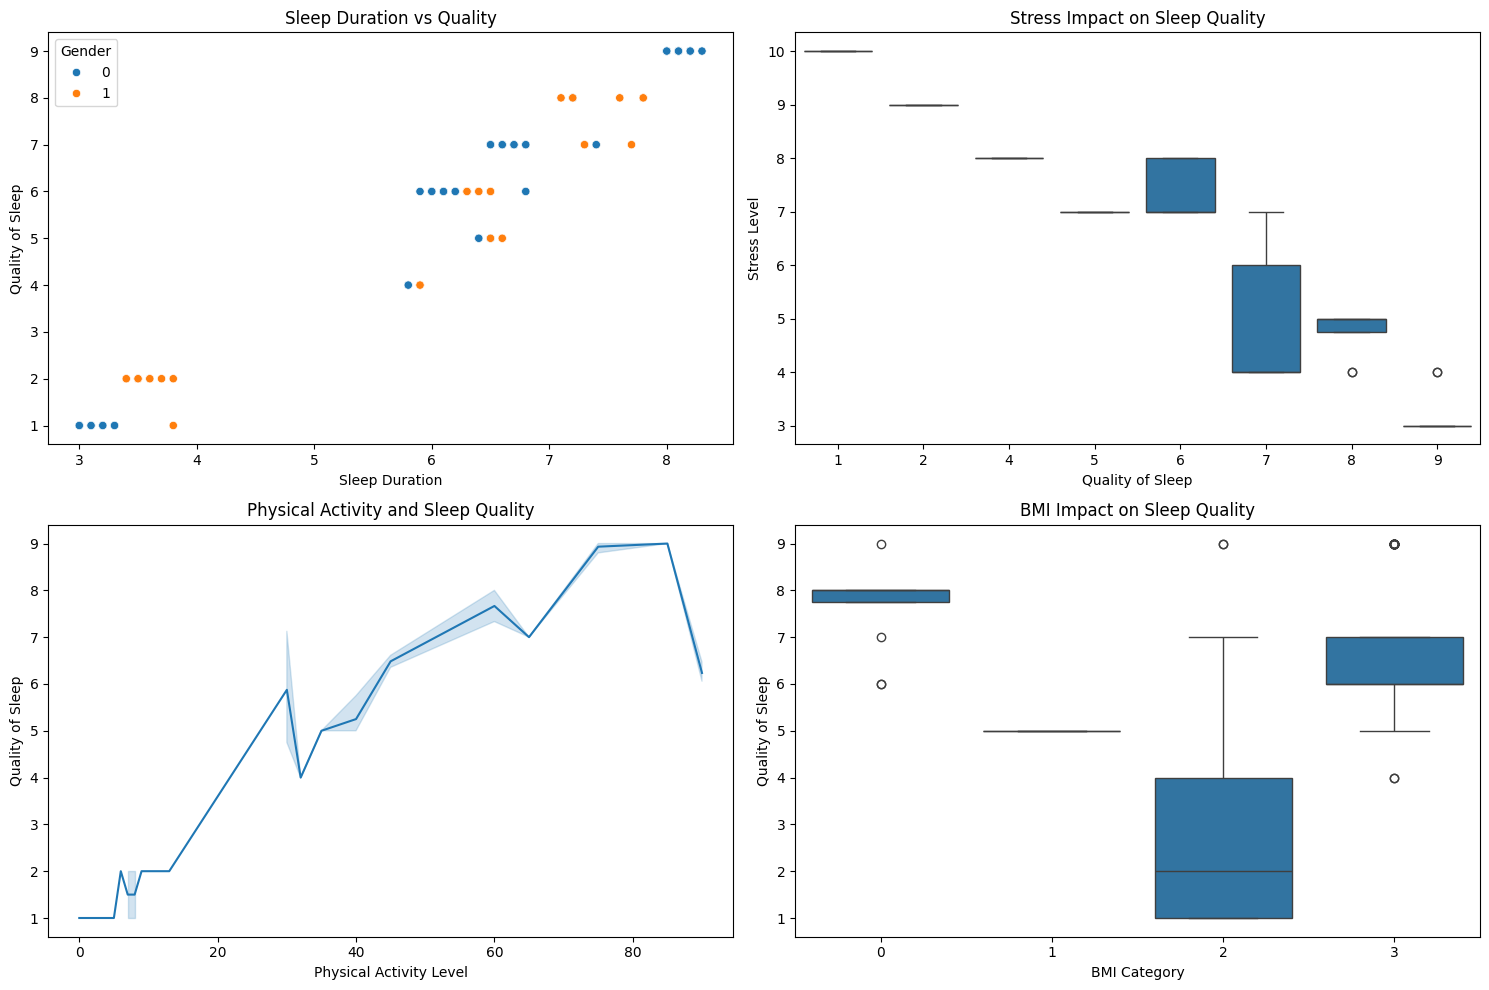

In [7]:
# Visualize relationships in data
plt.figure(figsize=(15, 10))

# Sleep Duration vs Quality
plt.subplot(2, 2, 1)
sns.scatterplot(data=data, x='Sleep Duration', y='Quality of Sleep', hue='Gender')
plt.title("Sleep Duration vs Quality")

# Stress Impact
plt.subplot(2, 2, 2)
sns.boxplot(data=data, x='Quality of Sleep', y='Stress Level')
plt.title("Stress Impact on Sleep Quality")

# Physical Activity
plt.subplot(2, 2, 3)
sns.lineplot(data=data, x='Physical Activity Level', y='Quality of Sleep')
plt.title("Physical Activity and Sleep Quality")

# BMI Impact
plt.subplot(2, 2, 4)
sns.boxplot(data=data, x='BMI Category', y='Quality of Sleep')
plt.title("BMI Impact on Sleep Quality")

plt.tight_layout()
plt.show()

In [8]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 73.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.1 MB/s eta 0:00:00


In [9]:
!pip install --upgrade --force-reinstall --ignore-installed blinker

In [10]:
%%writefile SleepSync.py
import pandas as pd
import numpy as np
import streamlit as st
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import joblib

# Set page config
st.set_page_config(page_title="SleepSync", page_icon="🌙", layout="wide")

@st.cache_data
def load_data():
    try:
        data = pd.read_csv("Sleep Dataset.csv")
        # Data cleaning
        data = data.drop_duplicates().dropna()

        # Feature engineering
        data['Mood'] = np.random.choice(["Lazy", "Active", "Relaxed", "Average", "Stressed", "Very Stressed"], size=len(data))
        data['Daily Steps'] = np.random.randint(1000, 20000, size=len(data))

        # Encoding
        le = LabelEncoder()
        categorical_cols = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder', 'Mood']
        for col in categorical_cols:
            if col in data.columns:
                data[col] = le.fit_transform(data[col])
        return data
    except Exception as e:
        st.error(f"Error loading data: {str(e)}")
        return None

@st.cache_resource
def train_model():
    data = load_data()
    if data is not None:
        X = data[['Age', 'Gender', 'BMI Category',
                 'Sleep Duration', 'Physical Activity Level',
                 'Stress Level', 'Daily Steps', 'Mood']]
        y = data['Quality of Sleep']
        model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
        model.fit(X, y)
        return model
    return None

def get_motivational_quote(prediction):
    quotes = {
        10: ("🌟 Perfect! You're a sleep superstar! Keep shining!", "green"),
        9: ("🌠 Amazing! Your sleep habits are inspiring!", "green"),
        8: ("✨ Excellent! Your body thanks you for this rest!", "green"),
        7: ("👍 Good job! Small improvements can make it perfect!", "blue"),
        6: ("💪 Almost there! You're on the right track!", "blue"),
        5: ("🤔 Not bad! Let's work on making it better!", "orange"),
        4: ("🧘‍♂️ Room to grow! Your better sleep starts tonight!", "orange"),
        3: ("⚠️ Needs work! But every night is a new opportunity!", "red"),
        2: ("😴 Tough night? Tomorrow is a chance to improve!", "red"),
        1: ("🆘 Let's fix this! Your health deserves better sleep!", "red")
    }
    return quotes.get(prediction, ("💤 Sleep is the golden chain that ties health and our bodies together.", "gray"))

def get_recommendations(prediction, mood):
    base_rec = {
        8: {
            "category": "Excellent 🌟",
            "message": "Your sleep habits are fantastic!",
            "color": "green",
            "words": "restful deep peaceful refreshed energized vibrant"
        },
        6: {
            "category": "Good 👍",
            "message": "Your sleep is decent but can improve",
            "color": "blue",
            "words": "consistent improve schedule relax unwind"
        },
        4: {
            "category": "Fair ⚠️",
            "message": "Your sleep needs attention",
            "color": "orange",
            "words": "tired focus routine consistent improve"
        },
        0: {
            "category": "Poor ❗",
            "message": "Your sleep needs significant improvement",
            "color": "red",
            "words": "exhausted fatigued restless drained sluggish"
        }
    }

    # Get base recommendations
    for threshold in sorted(base_rec.keys(), reverse=True):
        if prediction >= threshold:
            rec = base_rec[threshold]
            break

    # Mood-specific additions
    mood_tips = {
        "Lazy": ["Try gentle stretching before bed", "Consider a short afternoon walk"],
        "Active": ["Maintain your activity routine", "Allow proper wind-down time"],
        "Relaxed": ["Your calm mood is perfect for sleep", "Try light reading before bed"],
        "Average": ["Small improvements can help", "Monitor your sleep patterns"],
        "Stressed": ["Practice stress-reduction techniques", "Try journaling before bed"],
        "Very Stressed": ["Consider professional stress management", "Create a bedtime relaxation routine"]
    }

    rec["recommendations"] = [
        "Aim for 7-9 hours of sleep",
        "Keep bedroom dark and cool",
        "Limit screens before bedtime"
    ] + mood_tips.get(mood, [])

    return rec

def show_mood_advice(mood):
    advice = {
        "Lazy": "Gentle evening movement may improve sleep quality",
        "Active": "Your activity helps sleep! Just allow proper wind-down time",
        "Relaxed": "Your calm state is ideal for quality sleep tonight",
        "Average": "Maintain consistency in your sleep schedule",
        "Stressed": "Try relaxation techniques to improve sleep quality",
        "Very Stressed": "Consider a warm bath or herbal tea before bed"
    }

    colors = {
        "Lazy": "#2196F3",  # Blue
        "Active": "#4CAF50",  # Green
        "Relaxed": "#9C27B0",  # Purple
        "Average": "#FF9800",  # Orange
        "Stressed": "#F44336",  # Red
        "Very Stressed": "#D32F2F"  # Darker red
    }

    if mood in advice:
        st.markdown(
            f"""<div style='background-color:#f5f5f5; padding:12px; border-radius:8px;
            border-left:6px solid {colors[mood]}; margin:10px 0;'>
            <p style='font-size:16px; color:#333;'><b>Because you feel {mood}:</b> {advice[mood]}</p>
            </div>""",
            unsafe_allow_html=True
        )

def main():
    st.title("🌙 SleepSync - Sleep Quality Predictor")
    st.markdown("Discover how your daily activities affect your sleep quality")

    # Load model
    model = train_model()
    if model is None:
        st.error("Failed to load model. Please check your data.")
        return

    # Input form
    with st.form("sleep_form"):
        st.subheader("Your Daily Profile")

        col1, col2 = st.columns(2)

        with col1:
            age = st.slider("Age", 18, 100, 30)
            gender = st.radio("Gender", ["Male", "Female"])
            weight_category = st.selectbox(
                "Weight Category",
                ["Normal", "Overweight", "Obese"]
            )
            sleep_duration = st.slider("Sleep Duration (hours)", 3.0, 12.0, 7.0, 0.1)

        with col2:
            daily_steps = st.slider("Daily Steps", 1000, 20000, 8000)
            activity = st.slider("Exercise (minutes)", 0, 180, 30,
                               help="Moderate/vigorous activity today")
            mood = st.selectbox(
                "How do you feel today?",
                ["Lazy", "Active", "Relaxed", "Average", "Stressed", "Very Stressed"]
            )
            stress = st.slider("Stress Level (1-10)", 1, 10, 5)

        submitted = st.form_submit_button("Predict My Sleep Quality")

    # Prediction and results
    if submitted:
        # Encode inputs
        gender_enc = 0 if gender == "Male" else 1
        weight_map = {"Normal":0, "Overweight":1, "Obese":2}
        mood_map = {v:i for i,v in enumerate(["Lazy", "Active", "Relaxed", "Average", "Stressed", "Very Stressed"])}

        input_data = pd.DataFrame({
            'Age': [age],
            'Gender': [gender_enc],
            'BMI Category': [weight_map[weight_category]],
            'Sleep Duration': [sleep_duration],
            'Physical Activity Level': [activity],
            'Stress Level': [stress],
            'Daily Steps': [daily_steps],
            'Mood': [mood_map[mood]]
        })

        try:
            prediction = int(model.predict(input_data)[0])
            rec = get_recommendations(prediction, mood)
            quote, quote_color = get_motivational_quote(prediction)

            # Results header
            st.subheader(f"Sleep Quality: {prediction}/10 - {rec['category']}")
            st.progress(prediction/10)

            # Motivational quote box
            st.markdown(f"""
            <div style='background-color:#f0f2f6; padding:15px; border-radius:10px; border-left:5px solid {quote_color}; margin:10px 0;'>
            <p style='font-size:18px; color:black;'>{quote}</p>
            </div>
            """, unsafe_allow_html=True)

            # Visualization columns
            col1, col2 = st.columns(2)

            with col1:
                # Input visualization
                st.markdown("**Your Daily Inputs**")
                input_metrics = {
                    "Sleep Hours": sleep_duration,
                    "Daily Steps": daily_steps/1000,  # Convert to thousands
                    "Exercise (min)": activity,
                    "Stress Level": stress
                }

                fig, ax = plt.subplots(figsize=(8,4))
                bars = ax.bar(
                    list(input_metrics.keys()),
                    list(input_metrics.values()),
                    color=['#4dd0e1', '#66bb6a', '#ffa726', '#ef5350']
                )

                # Add value labels
                for bar in bars:
                    height = bar.get_height()
                    ax.text(bar.get_x() + bar.get_width()/2., height,
                            f'{height:.1f}' if isinstance(height, float) else f'{height}',
                            ha='center', va='bottom')

                ax.set_ylabel("Amount")
                plt.xticks(rotation=45)
                st.pyplot(fig)

                # Recommendations
                st.markdown("**Personalized Tips**")
                for item in rec['recommendations']:
                    st.markdown(f"• {item}")

            with col2:
                # Word cloud
                st.markdown("**Your Sleep Analysis**")
                wordcloud = WordCloud(
                    width=600, height=400,
                    background_color='white',
                    colormap='plasma'
                ).generate(rec['words'])
                plt.figure(figsize=(8,5))
                plt.imshow(wordcloud, interpolation='bilinear')
                plt.axis("off")
                st.pyplot(plt)

            # Mood-specific advice - NOW GUARANTEED TO SHOW FOR ALL MOODS
            show_mood_advice(mood)

        except Exception as e:
            st.error(f"Prediction error: {str(e)}")

if __name__ == "__main__":
    main()

Writing SleepSync.py


In [11]:
!streamlit run SleepSync.py &>/content/logs.txt & curl ipv4.icanhazip.com

104.198.42.67


In [ ]:
!npx localtunnel --port 8501

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) y

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹your url is: https://lazy-boxes-knock.loca.lt
